<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reto_4_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0. Cargamos Librerias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Librerías para clustering
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.ensemble import IsolationForest

# Score de silueta
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

Mounted at /content/drive


#**1. Cargamos la Base de Datos**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/marketing_campaign.csv', sep = '\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#**2. Organizamos la Base de Datos**

In [ ]:
#Seleccionamos solo las variables númericas
df_num = df.select_dtypes(include = np.number)

#Mostramos df_num
df_num.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
0              546              172  ...                  7             0   
1                6                2  ...                  5             0   
2              127              111  ...                  4             0   
3               20               10  ...                  6             0   
4              118               46  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 26 columns]

In [ ]:
#Al ver que hay variables como el ID que es un identificador, y ‘Z_CostContact’  y ‘Z_Revenue’ donde los resultados son iguales (3 y 11 respectivamente)
#Tambien se van a eliminar
df_num = df_num.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1)

#Mostramos
df_num.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   
2              127              111                21  ...   
3               20               10                 3  ...   
4              118               46                27  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0  

[5 rows x 23 columns]

In [ ]:
#Revisamos los datos
df_num.isna().sum()
#Eliminamos los datos faltantes
df_num = df_num.dropna()

#**3. Análisis de Correlaciones**

Se hace un dashboard conjunto para ver el comportamiento de todas las variables gráficamente

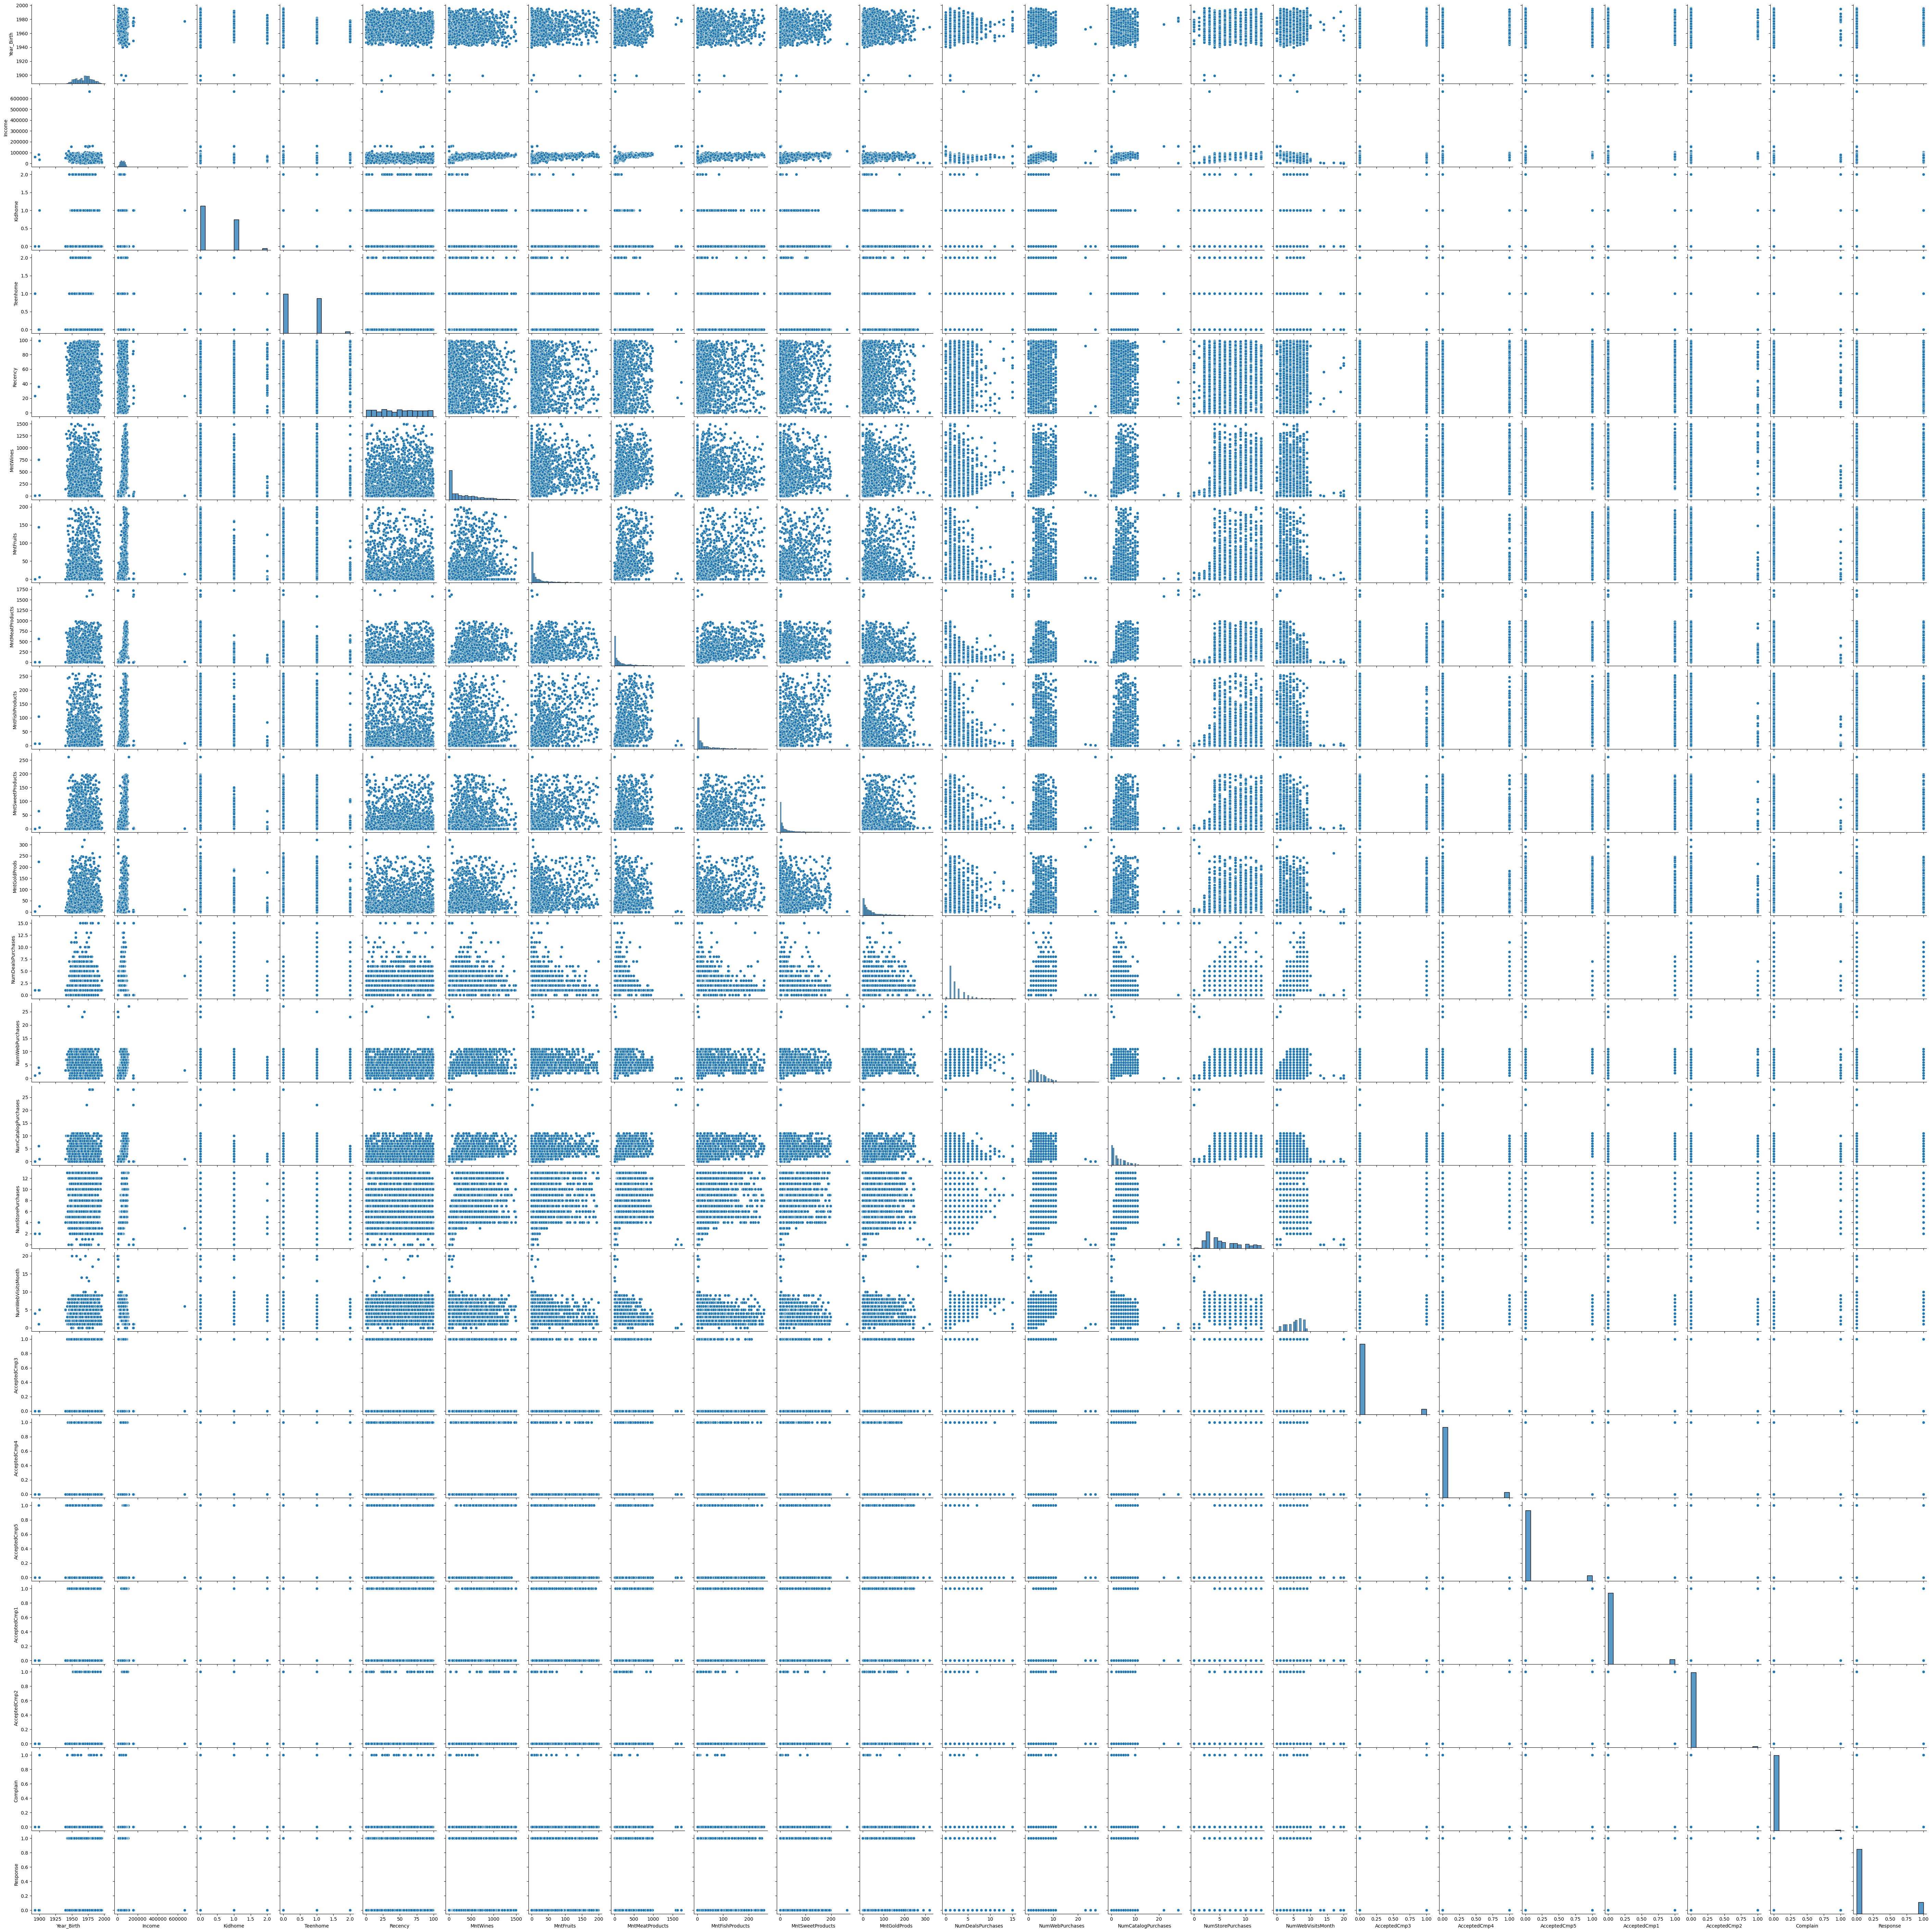

In [ ]:
#Se crea el DashBoard Conjunto
sns.pairplot(df_num)
plt.show()

Aquí podemos ver que la mayoria de las variables númericas, no tienen relación entre ellas. Mientras que existen otras como 'MntWines' y 'MntMeatProdcuts que muestran una relación entre ellas. No obstante, miraremos a detalle esta información, al implementar el coeficiente de correlación Pearson.

##*3.1.Coeficiente de Correlación PEARSON*

Se escoge este coeficiente de correlación, para medir la relación lineal entre dos variables continuas.

In [ ]:
#Matriz de Correlación entre variables
df_num.corr()

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.161791  0.233615 -0.350791 -0.016295   
Income                -0.161791  1.000000 -0.428669  0.019133 -0.003970   
Kidhome                0.233615 -0.428669  1.000000 -0.039869  0.011492   
Teenhome              -0.350791  0.019133 -0.039869  1.000000  0.013838   
Recency               -0.016295 -0.003970  0.011492  0.013838  1.000000   
MntWines              -0.159451  0.578650 -0.497336  0.003747  0.015721   
MntFruits             -0.017747  0.430842 -0.373396 -0.176558 -0.005844   
MntMeatProducts       -0.033697  0.584633 -0.439261 -0.261122  0.022518   
MntFishProducts       -0.040425  0.438871 -0.388884 -0.205242  0.000551   
MntSweetProducts      -0.020204  0.440744 -0.378026 -0.163056  0.025110   
MntGoldProds          -0.064208  0.325916 -0.355029 -0.019887  0.017663   
NumDealsPurchases     -0.058668 -0.083101  0.216913  0.386246  0.002115   
NumWebPurchases       -0.153051  0.387878 -0.371977  0.162077 -0.005641   
NumCatalogPurchases   -0.121764  0.589162 -0.504501 -0.112692  0.024081   
NumStorePurchases     -0.127891  0.529362 -0.501349  0.049737 -0.000434   
NumWebVisitsMonth      0.123904 -0.553088  0.447477  0.131240 -0.018564   
AcceptedCmp3           0.061784 -0.016174  0.016066 -0.042522 -0.032257   
AcceptedCmp4          -0.066109  0.184400 -0.162026  0.038376  0.017566   
AcceptedCmp5           0.010575  0.335943 -0.205305 -0.190791 -0.000482   
AcceptedCmp1          -0.009611  0.276820 -0.174163 -0.144855 -0.021061   
AcceptedCmp2          -0.006717  0.087545 -0.081868 -0.015521 -0.001400   
Complain              -0.030407 -0.027225  0.040978  0.003307  0.013637   
Response               0.023692  0.133047 -0.077909 -0.153901 -0.199766   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.159451  -0.017747        -0.033697        -0.040425   
Income               0.578650   0.430842         0.584633         0.438871   
Kidhome             -0.497336  -0.373396        -0.439261        -0.388884   
Teenhome             0.003747  -0.176558        -0.261122        -0.205242   
Recency              0.015721  -0.005844         0.022518         0.000551   
MntWines             1.000000   0.387024         0.568860         0.397721   
MntFruits            0.387024   1.000000         0.547822         0.593431   
MntMeatProducts      0.568860   0.547822         1.000000         0.573574   
MntFishProducts      0.397721   0.593431         0.573574         1.000000   
MntSweetProducts     0.390326   0.571606         0.535136         0.583867   
MntGoldProds         0.392731   0.396487         0.359446         0.427142   
NumDealsPurchases    0.008886  -0.134512        -0.121308        -0.143241   
NumWebPurchases      0.553786   0.302039         0.307090         0.299688   
NumCatalogPurchases  0.634753   0.486263         0.734127         0.532757   
NumStorePurchases    0.640012   0.458491         0.486006         0.457745   
NumWebVisitsMonth   -0.321978  -0.418729        -0.539484        -0.446423   
AcceptedCmp3         0.061463   0.014424         0.018438        -0.000219   
AcceptedCmp4         0.373143   0.006396         0.091618         0.016105   
AcceptedCmp5         0.473550   0.212871         0.376867         0.196277   
AcceptedCmp1         0.351417   0.191816         0.313076         0.261608   
AcceptedCmp2         0.206185  -0.009980         0.043521         0.002345   
Complain            -0.039470  -0.005324        -0.023782        -0.021220   
Response             0.246299   0.122443         0.237746         0.108145   

                     MntSweetProducts  ...  NumCatalogPurchases  \
Year_Birth                  -0.020204  ...            -0.121764   
Income                       0.440744  ...             0.589162   
Kidhome                     -0.378026  ...            -0.504501   
Teenhome                    -0.163056  ...            -0.112692   
Recency     

In [ ]:
#Pasamos los datos de la correlación a excel, porque prefiero analizar la matriz desde allí.
df_num.corr().to_excel('Matriz_Correlación.xlsx')

<Axes: >

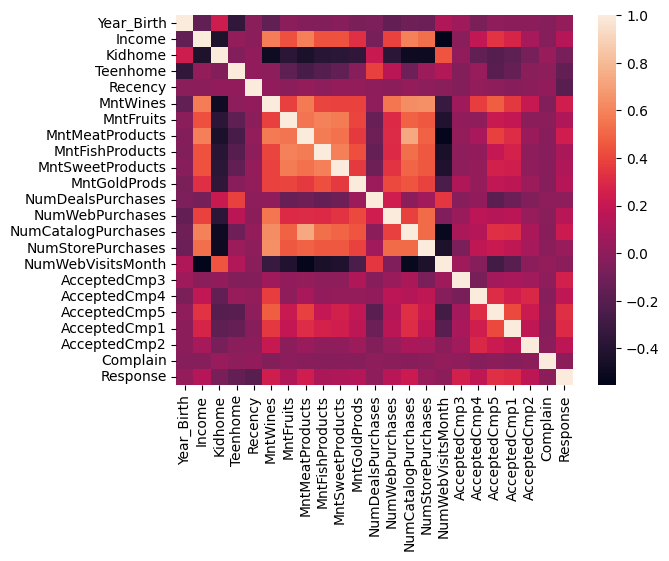

In [ ]:
#Hacemos un Diagrama de Calor para visualizar la información
sns.heatmap(df_num.corr())

Aqui podemos ver que viendo la gráfica vemos que hay dos cuadros más claros, los cuales corresponden a la correlación positiva de NumCatalogPurchases and MntMeatProducts que equivale a 0,734126597863146. Cuando revisamos la matriz,se logró comprobar que efectivamente estas dos son las variables con la correlación más alta. Por otro lado, vemos que alrededor de la cantidad de productos ya sea de 'meat', 'fish', 'sweet', 'fruits' and 'wines' también tenemos cuadros claros lo que muestra que estas variables tienen una relación entre sí. Finalmente, vemos que 'Kidhome' y 'NumWebVisitsMonth' son aquellas que más cuadros oscuros tienen, mostrando que comparten una relación negativa con muchas de las variables de la base de datos. Ahora, revisando la matriz se puede decir que las variables que tienen la pero correlación son 'NumWebVisitsMonth' e 'Income' con -0,553088011653097.

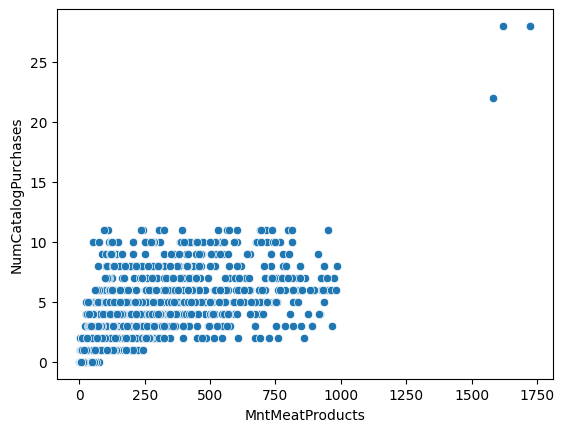

In [ ]:
#Graficamos solamente las variables con la correlación mayor
sns.scatterplot( x=df_num["MntMeatProducts"], y=df_num["NumCatalogPurchases"])
plt.show()

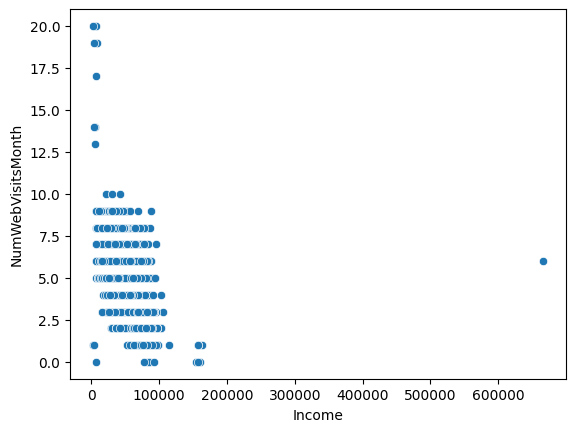

In [ ]:
#Graficamos las variables con peor correlación
sns.scatterplot( x=df_num["Income"], y=df_num["NumWebVisitsMonth"])
plt.show()

##*3.2. Correlación Múltiple*

In [ ]:
def correlacion_multiple(df_num):
  S= df_num.cov()
  S_inv= np.linalg.inv(S)
  Vector_Corre_Multiples = pd.Series((1 - 1/ (np.diag(S) * np.diag(S_inv))), index= df_num.columns)
  return Vector_Corre_Multiples
correlacion_multiple(df_num)

Year_Birth             0.193416
Income                 0.547049
Kidhome                0.470392
Teenhome               0.381298
Recency                0.058145
MntWines               0.701811
MntFruits              0.487789
MntMeatProducts        0.675261
MntFishProducts        0.529589
MntSweetProducts       0.479801
MntGoldProds           0.337086
NumDealsPurchases      0.401914
NumWebPurchases        0.497935
NumCatalogPurchases    0.678490
NumStorePurchases      0.590761
NumWebVisitsMonth      0.576791
AcceptedCmp3           0.137316
AcceptedCmp4           0.275257
AcceptedCmp5           0.401152
AcceptedCmp1           0.264374
AcceptedCmp2           0.138540
Complain               0.006962
Response               0.284823
dtype: float64

In [ ]:
#Pasamos los datos de correlación múltiple a excel
correlacion_multiple(df_num).to_excel('Correlación_Múltiple.xlsx')

Con base a los resultados de la correlación múltiple, vemos que las variables que mayor relación tienen con respecto a las otras variables son 'MntWines', 'MntMeatProducts', y 'NumCatalogPurchases' teniendo correlaciones del 0,701810843613515, 0,675261269171359, y 0,678490232277893 respectivamente. Siendo 'MntWines' el que mayor relación tiene con el resto de las variables de la base de datos.

Por otro lado, 'Recency' (0,05814544691508) y 'Complain' (0,00696203078251945), son las variables que menor relación tienen con respecto al resto.

#**4. Algoritmos de Clustering**

In [ ]:
#Creamos una copia para no dañar la original
df_num1 = df_num.copy()

#Estandarizamos las variables
scaler = StandardScaler()
scaled_features= scaler.fit_transform(df_num1)
scaled_features

array([[-0.98644293,  0.2340627 , -0.82303932, ..., -0.11714818,
        -0.09781206,  2.37795178],
       [-1.23680074, -0.23455948,  1.03993835, ..., -0.11714818,
        -0.09781206, -0.42052997],
       [-0.31882209,  0.76947764, -0.82303932, ..., -0.11714818,
        -0.09781206, -0.42052997],
       ...,
       [ 1.01641959,  0.18809052, -0.82303932, ..., -0.11714818,
        -0.09781206, -0.42052997],
       [-1.06989553,  0.67538765, -0.82303932, ..., -0.11714818,
        -0.09781206, -0.42052997],
       [-1.23680074,  0.02470453,  1.03993835, ..., -0.11714818,
        -0.09781206,  2.37795178]])

##*4.1. K-Means*

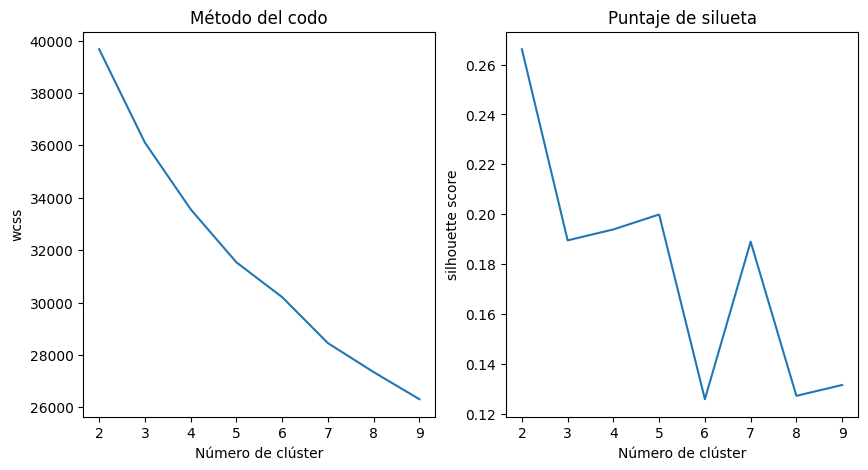

In [ ]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Basandonos en el metodo del codo, si bien no hay un 'codo' claro, se podría decir que hay una breve inflexión en el número 5. Asimismo, en el puntaje de silueta, vemos que el punto máximo está en el 5. Al ver que el número de clústers coincide en ambos métodos, este será el número utilizado (**5**).



In [ ]:
#Si escogemos 5
k_means=KMeans(5, random_state=123  )
k_means.fit(scaled_features )
df_num1["labels_k_means"]= k_means.labels_
df_num1["labels_k_means"] = df_num1["labels_k_means"].astype(str)
df_num1["labels_k_means"].value_counts()

labels_k_means
0    1014
1     627
3     524
2      30
4      21
Name: count, dtype: int64

In [ ]:
#Interpretamos los Datos
print(df_num1["labels_k_means"].value_counts(normalize=True))
px.bar(df_num1["labels_k_means"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_k_means
0    0.457581
1    0.282942
3    0.236462
2    0.013538
4    0.009477
Name: proportion, dtype: float64


##*4.2. Clústering Jerárquico*

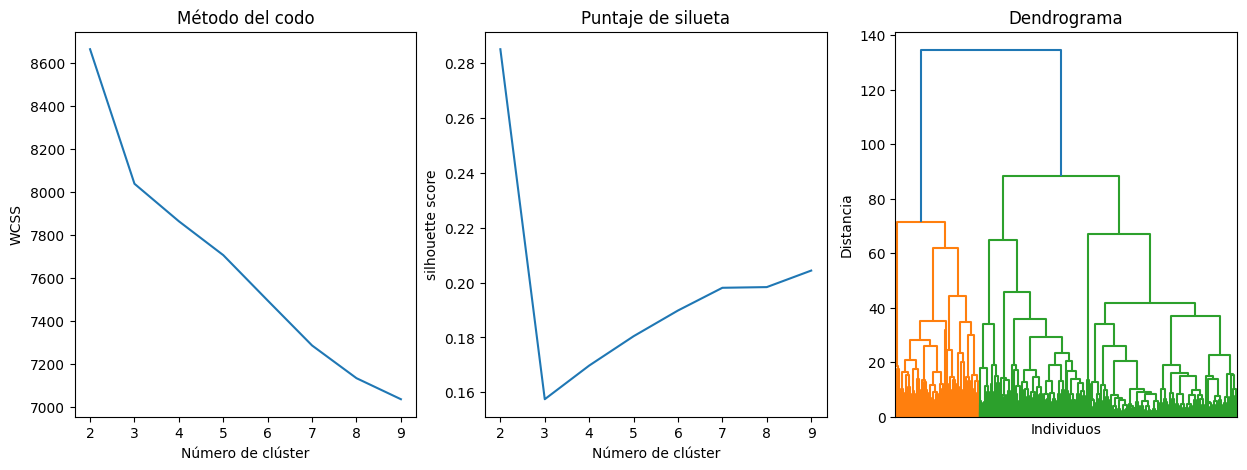

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros)  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Viendo el método del codo, hay evidente un codo en 3, al igual que uno breve en el 5. Ahora, en el puntaje de silueta hay dos puntos máximo en el 7 y en 9. En el dendograma el número de clústers sería entre (5 y 7).
Analizando cada uno de los números obtenidos en el resto de métodos, el 3 tiene un declive en el puntaje de siulueta y por ende no se va a considera. Por ende, tenemos tres posibles números de clúster (5, 7 y 9), que analizaremos viendo la distribución de los datos.

In [ ]:
#Escogiendo 5
hc=AgglomerativeClustering(5)
hc.fit(scaled_features )
df_num1["labels_hc"]= hc.labels_
df_num1["labels_hc"] = df_num1["labels_hc"].astype(str)
df_num1["labels_hc"].value_counts()

labels_hc
2    953
0    695
1    517
3     30
4     21
Name: count, dtype: int64

In [ ]:
#Escogiendo 9
hc=AgglomerativeClustering(9)
hc.fit(scaled_features )
df_num1["labels_hc"]= hc.labels_
df_num1["labels_hc"] = df_num1["labels_hc"].astype(str)
df_num1["labels_hc"].value_counts()

labels_hc
0    953
1    485
2    301
6    151
5    133
7     77
3     65
8     30
4     21
Name: count, dtype: int64

In [ ]:
#Escogiendo 7
hc=AgglomerativeClustering(7)
hc.fit(scaled_features )
df_num1["labels_hc"]= hc.labels_
df_num1["labels_hc"] = df_num1["labels_hc"].astype(str)
df_num1["labels_hc"].value_counts()

labels_hc
2    953
0    562
6    301
1    216
5    133
3     30
4     21
Name: count, dtype: int64

Viendo la distribución se escoge que el número apropriado de clústers es **7**, porque es el que tiene una mejor distribución de datos (más pareja).

In [ ]:
print(df_num1["labels_hc"].value_counts(normalize=True))
px.bar(df_num1["labels_hc"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_hc
2    0.430054
0    0.253610
6    0.135830
1    0.097473
5    0.060018
3    0.013538
4    0.009477
Name: proportion, dtype: float64


#**5. Detección de Datos Atípicos**

Se utilizará la técnica de **'Isolation Forest'**

In [ ]:
#Creamos un copia
df_num2 = df_num.copy()

In [ ]:
modelo_atipicos = IsolationForest(contamination=0.01, random_state=123)
modelo_atipicos.fit(df_num2)
df_num2["atipico_isolation_forest"] = modelo_atipicos.predict(df_num2)
df_num2["atipico_isolation_forest"].value_counts()

atipico_isolation_forest
 1    2193
-1      23
Name: count, dtype: int64

In [ ]:
fig = px.scatter(df_num2, color="atipico_isolation_forest",marginal_x="box", marginal_y="box")
fig.show()

Aplicando este método notamos que dentro de la base de datos tenemos más bien pocos datos atípicos (23), lo cuales en el gráfico tienen un color azul oscuro.

In [ ]:
#Se crea un DataFrame para los datos sin atípicos
df_num_sa = df_num2[df_num2["atipico_isolation_forest"] == 1]
df_num_sa.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumStorePurchases  \
0              546              172                88  ...                  4   
1                6                2                 1  ...                  2   
2              127              111                21  ...                 10   
3               20               10                 3  ...                  4   
4              118               46                27  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  atipico_isolation_forest  
0             0         0         1                         1  
1             0         0         0                         1  
2             0         0         0                         1  
3             0         0         0                         1  
4             0         0         0                         1  

[5 rows x 24 columns]

In [ ]:
#Borramos la columna atipico_isolation_forest
df_num_sa = df_num_sa.drop("atipico_isolation_forest", axis = 1)

#**6. Reducción de Dimensionalidad**

##*6.1. Datos Con Atípicos (df_num)*

In [ ]:
#Creamos una última copia
df_num3 = df_num.copy()

In [ ]:
#Implementamos PCA
num_variables= df_num3.shape[1]
scale_feature=StandardScaler().fit_transform(df_num3)
pca= PCA(num_variables)
pca.fit(scale_feature)

PCA(n_components=23)

In [ ]:
pd.DataFrame(pca.fit_transform(scale_feature)).corr()

0             1             2             3             4   \
0   1.000000e+00 -1.987901e-16 -1.232559e-17  4.190793e-17  1.144697e-16   
1  -1.987901e-16  1.000000e+00  2.277249e-16 -1.827711e-16  7.007092e-17   
2  -1.232559e-17  2.277249e-16  1.000000e+00  5.380824e-17  1.195728e-16   
3   4.190793e-17 -1.827711e-16  5.380824e-17  1.000000e+00 -3.577833e-17   
4   1.144697e-16  7.007092e-17  1.195728e-16 -3.577833e-17  1.000000e+00   
5   2.008712e-17  4.757272e-17  1.377048e-16 -3.588898e-16 -1.586432e-16   
6  -5.335772e-17  5.502360e-17 -2.394239e-17  1.414523e-16 -1.361126e-16   
7   6.058523e-17  4.894252e-17 -9.231933e-17  3.353132e-16 -9.589598e-17   
8   1.283185e-16 -1.238349e-16  5.731322e-17  5.293448e-16 -1.264530e-16   
9   8.639930e-19 -6.402692e-17 -2.005478e-16 -3.287351e-16 -1.189808e-16   
10 -1.027899e-16 -2.241852e-17  1.023658e-16  3.022909e-16  4.711467e-18   
11  5.769251e-17 -3.694827e-17  2.353100e-17  8.379353e-17  9.014578e-17   
12  5.620338e-18  1.008549e-16  7.804056e-17 -2.840085e-17  4.910884e-17   
13  3.856066e-17  7.562630e-18  1.838557e-16 -5.805184e-17 -1.370023e-16   
14  1.519506e-16  3.479925e-17 -1.289833e-17  1.494012e-16  1.781421e-16   
15  1.715487e-17  5.116243e-17  1.803915e-17 -2.000741e-16 -4.622665e-17   
16 -3.943424e-17 -9.957969e-17 -9.453830e-17 -2.883199e-17  4.322455e-17   
17  3.735269e-18  1.158726e-17  7.825770e-17 -1.660886e-16  6.665800e-17   
18 -3.398170e-17 -3.351306e-17  2.043130e-16 -3.249162e-16  1.847363e-16   
19 -1.291330e-16 -5.547117e-17 -2.934937e-17  2.333576e-17 -1.412889e-16   
20 -5.875176e-17 -1.230154e-16 -2.990062e-18 -3.888306e-17 -1.133985e-16   
21  5.106814e-17  1.004668e-16 -1.924566e-17  9.465871e-17 -2.224511e-16   
22 -9.359118e-17  5.446020e-17 -1.295987e-16  6.413622e-17  9.032484e-17   

              5             6             7             8             9   ...  \
0   2.008712e-17 -5.335772e-17  6.058523e-17  1.283185e-16  8.639930e-19  ...   
1   4.757272e-17  5.502360e-17  4.894252e-17 -1.238349e-16 -6.402692e-17  ...   
2   1.377048e-16 -2.394239e-17 -9.231933e-17  5.731322e-17 -2.005478e-16  ...   
3  -3.588898e-16  1.414523e-16  3.353132e-16  5.293448e-16 -3.287351e-16  ...   
4  -1.586432e-16 -1.361126e-16 -9.589598e-17 -1.264530e-16 -1.189808e-16  ...   
5   1.000000e+00  1.546551e-17 -1.098443e-16 -1.405451e-17 -1.226379e-16  ...   
6   1.546551e-17  1.000000e+00  1.925974e-16  2.004259e-16  6.667756e-18  ...   
7  -1.098443e-16  1.925974e-16  1.000000e+00 -4.723479e-16  2.259398e-16  ...   
8  -1.405451e-17  2.004259e-16 -4.723479e-16  1.000000e+00 -6.111217e-18  ...   
9  -1.226379e-16  6.667756e-18  2.259398e-16 -6.111217e-18  1.000000e+00  ...   
10  6.817152e-17 -1.113825e-16 -1.080496e-17 -8.321256e-17 -5.730962e-18  ...   
11 -1.599530e-16  7.314335e-17 -9.950627e-17 -1.265900e-17 -4.835461e-17  ...   
12  2.562415e-17 -7.492628e-17  7.874237e-18 -1.576914e-16  1.093369e-16  ...   
13  1.442366e-16  1.808604e-16  5.780478e-17 -2.139485e-16 -4.464026e-16  ...   
14 -4.027044e-16  2.121255e-16 -1.376030e-16  3.404351e-17 -1.799831e-16  ...   
15 -5.010677e-17 -1.688201e-17  7.462962e-17  1.754443e-17 -4.458192e-16  ...   
16 -8.975261e-17  2.657044e-17 -5.120931e-17 -4.836880e-17  1.045994e-16  ...   
17 -1.507777e-16  1.638866e-16 -7.828365e-17 -5.895420e-17  3.170101e-16  ...   
18  1.039542e-16  1.813234e-16  1.622497e-16  8.752586e-17 -4.683230e-16  ...   
19 -1.916114e-16  2.970891e-17  2.093894e-16 -1.721138e-16 -3.713000e-16  ...   
20 -4.419535e-16  7.190888e-17  2.485044e-16 -1.460570e-18  1.579246e-16  ...   
21  4.418813e-17 -7.617565e-17 -3.546585e-16  3.450486e-16  8.865693e-17  ...   
22 -2.429987e-16  5.018969e-16  2.740077e-16  4.944559e-16 -8.876381e-17  ...   

              13            14            15            16            17  \
0   3.856066e-17  1.519506e-16  1.715487e-17 -3.943424e-17  3.735269e-18   
1   7.562630e-18  3.479925e-17  5.116243e-17 -9.957969e-17  1.158726e-17   
2   1.838557e-16

In [ ]:
#Valor propio de cada componente
pca.explained_variance_

array([6.54495428, 2.03438888, 1.90366349, 1.40231118, 1.0986413 ,
       1.02303058, 0.98469854, 0.85658838, 0.75848444, 0.74252845,
       0.65930259, 0.61326205, 0.58281375, 0.56316856, 0.51987124,
       0.46332321, 0.42749512, 0.40948894, 0.37596829, 0.31718154,
       0.29891488, 0.23464699, 0.19565707])

In [ ]:
#Proporción de la varianza explicada de cada componente
pd.Series(pca.explained_variance_ratio_)

0     0.284435
1     0.088412
2     0.082731
3     0.060943
4     0.047745
5     0.044460
6     0.042794
7     0.037226
8     0.032963
9     0.032269
10    0.028652
11    0.026652
12    0.025328
13    0.024475
14    0.022593
15    0.020135
16    0.018578
17    0.017796
18    0.016339
19    0.013784
20    0.012990
21    0.010197
22    0.008503
dtype: float64

In [ ]:
#Varianza explicada acumulada
pca.explained_variance_ratio_.cumsum()

array([0.28443482, 0.37284659, 0.45557722, 0.51651976, 0.56426521,
       0.60872473, 0.65151839, 0.68874456, 0.72170726, 0.75397654,
       0.78262893, 0.80928047, 0.83460876, 0.8590833 , 0.8816762 ,
       0.9018116 , 0.92038995, 0.93818579, 0.95452486, 0.96830914,
       0.98129957, 0.99149701, 1.        ])

Text(0, 0.5, 'Varianza explicada acumulada')

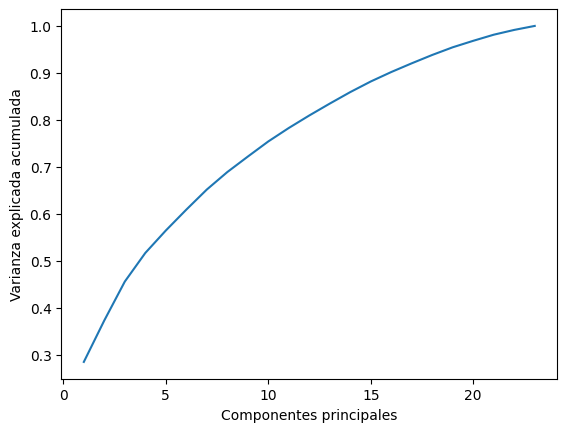

In [ ]:
sns.lineplot( x=range(1, num_variables+1), y=pca.explained_variance_ratio_.cumsum())
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada acumulada")

Para tomar la decisión de los componentes principales, me base más que todo en los valores de la varianza explicada acumulada y en la gráfica realizada. Aquí, lo que hice fue decidir un porcentaje al cuál debía aproximarse el valor de la varianza explicada acumulada y así poder elegir. Para este caso, decidí que el número de componenetes necesarios serán aquellos que expliquen el 80% de la varianza total. Fijandonos en los resultados, el número de componentes estaría entre 11 (0.78262893) y 12 componentes principales (0.80928047). Ahora, después de mirar esto, se decidió que el número de componentes principales será **12** pues es el que más se acerca el 80%.

In [ ]:
#Extraemos los componentes
pca= PCA(12)
pca.fit(scale_feature)

PCA(n_components=12)

In [ ]:
#Hacemos una tabla que ayude a analizar las cargas de los componentes y entender mejor los componentes principales
pd.DataFrame(pca.components_.T, index= df_num3.columns)

0         1         2         3         4   \
Year_Birth          -0.057513 -0.340201  0.033753  0.276912 -0.489639   
Income               0.291547  0.069793 -0.025552 -0.133636  0.069386   
Kidhome             -0.255521 -0.101518  0.080693  0.186452 -0.211875   
Teenhome            -0.056783  0.538377  0.003976 -0.093455  0.206253   
Recency              0.000627  0.040595 -0.105394 -0.197241 -0.524033   
MntWines             0.306030  0.158265  0.199712 -0.045644 -0.081587   
MntFruits            0.266216 -0.092980 -0.203881  0.145851 -0.052043   
MntMeatProducts      0.314330 -0.123743 -0.063814  0.036184 -0.033146   
MntFishProducts      0.276154 -0.103343 -0.202403  0.122644 -0.055439   
MntSweetProducts     0.269296 -0.084637 -0.170518  0.106306 -0.098825   
MntGoldProds         0.221349  0.105248 -0.054589  0.286999 -0.037371   
NumDealsPurchases   -0.055540  0.456503  0.082728  0.338215 -0.244331   
NumWebPurchases      0.212035  0.357329  0.063104  0.233845 -0.128653   
NumCatalogPurchases  0.318604  0.015592 -0.017222  0.057219  0.030565   
NumStorePurchases    0.282749  0.211656 -0.081677 -0.032052 -0.115145   
NumWebVisitsMonth   -0.247144  0.160414  0.219703  0.290665 -0.201860   
AcceptedCmp3         0.020085 -0.095200  0.201708  0.427133  0.311900   
AcceptedCmp4         0.096010  0.103672  0.421955 -0.321824 -0.217707   
AcceptedCmp5         0.192406 -0.180795  0.344523 -0.140257 -0.036885   
AcceptedCmp1         0.171689 -0.152443  0.308281 -0.031053 -0.004273   
AcceptedCmp2         0.058648 -0.010780  0.393096 -0.185121 -0.092175   
Complain            -0.015546  0.000548 -0.017001  0.008651  0.159406   
Response             0.108132 -0.130221  0.410711  0.301376  0.239884   

                           5         6         7         8         9   \
Year_Birth          -0.134840  0.125318  0.193098  0.382702 -0.115536   
Income              -0.021442  0.021186 -0.146818  0.300491  0.134322   
Kidhome              0.033811  0.120275 -0.272727  0.033378  0.359064   
Teenhome             0.038009 -0.096127 -0.078787 -0.004648  0.168296   
Recency              0.586334 -0.408472 -0.193711 -0.073162 -0.034149   
MntWines             0.003560  0.006182 -0.006107  0.170051 -0.182846   
MntFruits           -0.019688  0.078391  0.085513 -0.220582  0.111422   
MntMeatProducts      0.010162  0.041308 -0.182151  0.208446  0.155192   
MntFishProducts     -0.022733  0.044986  0.050555 -0.298177  0.155384   
MntSweetProducts    -0.014532  0.057378  0.002709 -0.260913  0.122492   
MntGoldProds         0.086615 -0.160971  0.233098 -0.240558 -0.097569   
NumDealsPurchases   -0.038030  0.137372 -0.228894  0.136921  0.371000   
NumWebPurchases     -0.031487  0.057398  0.067362 -0.077859 -0.338113   
NumCatalogPurchases  0.070599 -0.056123 -0.093773  0.244320  0.157986   
NumStorePurchases   -0.081008  0.102234  0.160887  0.165414 -0.088550   
NumWebVisitsMonth   -0.007041  0.060403  0.051427 -0.247924 -0.166101   
AcceptedCmp3         0.348353 -0.453234  0.122199  0.249221 -0.083712   
AcceptedCmp4        -0.094113  0.130926  0.061124 -0.046747 -0.200806   
AcceptedCmp5         0.062676  0.020269 -0.230239  0.055002 -0.103088   
AcceptedCmp1         0.037914 -0.006991 -0.352368 -0.411846  0.047049   
AcceptedCmp2         0.071744 -0.093271  0.626107 -0.059069  0.561429   
Complain             0.684441  0.691077  0.121846  0.030998 -0.052143   
Response            -0.055099  0.073803 -0.169317 -0.078500  0.033866   

                           10        11  
Year_Birth           0.321589  0.005066  
Income               0.142316 -0.024876  
Kidhome              0.091362 -0.015647  
Teenhome             0.301021 -0.092188  
Recency             -0.212857 -0.043868  
MntWines            -0.016273 -0.011270  
MntFruits           -0.068998 -0.250011  
MntMeatProducts     -0.212261  0.042589  
MntFishProducts     -0.006949 -0.113836  
MntSweetProducts     0.051341 -0.355822  
MntGoldProds         0.063353  0.704733  
NumDealsPurchases

In [ ]:
#Pasamos esto a un excel
pd.DataFrame(pca.components_.T, index= df_num3.columns).to_excel('Componentes_ca.xlsx')

Por ejemplo, el Componente 5 está fuertemente relacionado con las variables 'Recency' (0,5863) y 'Complain' (0,6844). Sugiriendo que este componente captura la variabilidad relacionada con esta dos variables.

###**K-Means**

In [ ]:
z_componentes= pca.fit_transform(scale_feature)

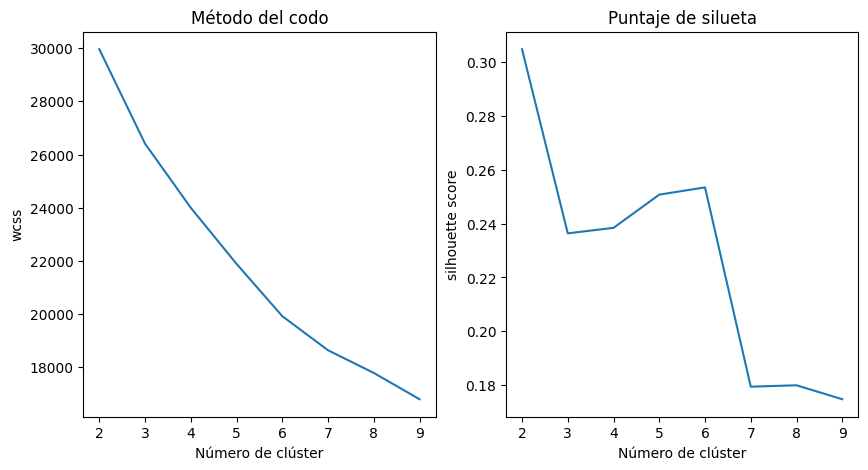

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means1 =KMeans(k, random_state=123)
  k_means1.fit(z_componentes)
  wcss.append(k_means1.inertia_ )
  silueta = silhouette_score(z_componentes, k_means1.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Con base al método del codo, notamos que existe un leve 'codo' en el punto 6. De la misma manera, en el puntaje de silueta vemos que hay un punto máximo en el punto 6. Por ende, en ambos métodos coincide que el número de clúster apropiado es **6**.

In [ ]:
#Mostramos la distibución de los datos
k_means1=KMeans(6, random_state=123)
k_means1.fit(z_componentes)

df_num3["labels_k_means"]= k_means1.labels_
df_num3["labels_k_means"] = df_num3["labels_k_means"].astype(str)
df_num3["labels_k_means"].value_counts()

labels_k_means
0    991
2    582
1    402
4    190
3     30
5     21
Name: count, dtype: int64

In [ ]:
#Grafiquemos
print(df_num3["labels_k_means"].value_counts(normalize=True))
px.bar(df_num3["labels_k_means"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_k_means
0    0.447202
2    0.262635
1    0.181408
4    0.085740
3    0.013538
5    0.009477
Name: proportion, dtype: float64


###**Clúster Jerárquico**

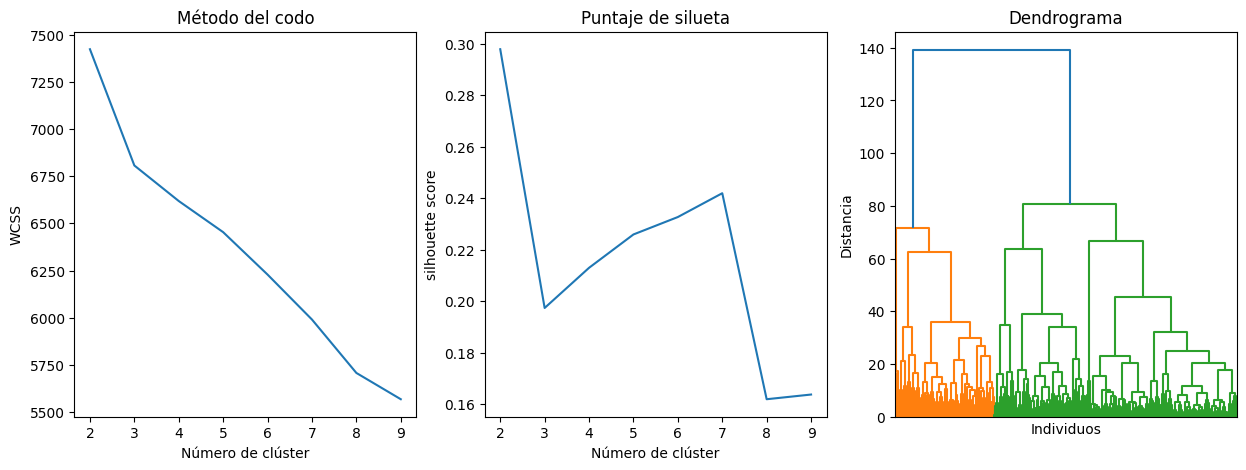

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(z_componentes)
  scaled_temp= pd.DataFrame(z_componentes)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(z_componentes,centros)  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(z_componentes,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(z_componentes, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Según el método del codo, vemos que hay un 'codo' marcado en el número 3 y dos leves en el punto 5 y en el 8. Por otro lado, en el puntaje de silueta encontramos un máximo en el punto 7. Finalmente en el dendograma, el número de clústers estaría entre 3 y 5. Analizando el número 3 en el puntaje de silueta vemos que hay un bajón en este punto, por ende lo descartamos. Al igual que en el punto 3, en el punto 8 pasa exactamente lo mismo. Hablando del punto 5, vemos que en el puntaje de silueta, si bien no es el punto máximo, es de los más altos. Con respecto, al punto 7 en el método del codo, vemos que no hay mucha diferencia entre los datos entre los puntos 5,6 y 7.
Es por eso, que vamos a mirar la distribución de los datos en el punto 5 y en el 7, para tomar una decisión.

In [ ]:
#Escogiendo 7
hc1=AgglomerativeClustering(7)
hc1.fit(z_componentes)
df_num3["labels_hc"]= hc1.labels_
df_num3["labels_hc"] = df_num3["labels_hc"].astype(str)
df_num3["labels_hc"].value_counts()

labels_hc
0    951
2    475
1    468
6    139
5    132
3     30
4     21
Name: count, dtype: int64

In [ ]:
#Escogiendo 5
hc1=AgglomerativeClustering(5)
hc1.fit(z_componentes)
df_num3["labels_hc"]= hc1.labels_
df_num3["labels_hc"] = df_num3["labels_hc"].astype(str)
df_num3["labels_hc"].value_counts()

labels_hc
2    951
1    614
0    600
3     30
4     21
Name: count, dtype: int64

Vemos que en ambos casos, los datos en los clústers 3 y 4, son muy distintos a los demás pues sin importar el número de clústers siempre se mantienen por separado. Pero, sumandole a la distribución los resultados del dendograma, el método del codo, y el puntaje de silueta. El número de clústers elegido será el **5**.

In [ ]:
print(df_num3["labels_hc"].value_counts(normalize=True))
px.bar(df_num3["labels_hc"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_hc
2    0.429152
1    0.277076
0    0.270758
3    0.013538
4    0.009477
Name: proportion, dtype: float64


##*6.2. Datos Sin Atípicos (df_num_sa)*

In [ ]:
#Creamos una copia de df_num_sa
df_num_sa1 = df_num_sa.copy()

In [ ]:
#Implementamos PCA
num_variables1= df_num_sa1.shape[1]
scale_feature1 = StandardScaler().fit_transform(df_num_sa1)
pca= PCA(num_variables1)
pca.fit(scale_feature1)

PCA(n_components=23)

In [ ]:
pd.DataFrame(pca.fit_transform(scale_feature1)).corr()

0             1             2             3             4   \
0   1.000000e+00  4.402725e-16 -4.876172e-17  9.117720e-17 -5.716812e-17   
1   4.402725e-16  1.000000e+00 -2.647013e-16  4.907546e-16  1.827858e-16   
2  -4.876172e-17 -2.647013e-16  1.000000e+00  3.508566e-16  1.693629e-16   
3   9.117720e-17  4.907546e-16  3.508566e-16  1.000000e+00 -2.849360e-16   
4  -5.716812e-17  1.827858e-16  1.693629e-16 -2.849360e-16  1.000000e+00   
5  -2.900760e-17 -1.139051e-17 -2.428019e-16 -1.213038e-16  2.204554e-17   
6   9.020793e-17 -1.972538e-16  4.968526e-17  2.459227e-16 -9.633177e-17   
7  -2.766551e-17 -1.320885e-16 -5.394490e-17 -1.329537e-17 -2.986004e-17   
8   2.322759e-17 -1.005016e-16 -1.292473e-17  5.011443e-16  2.166252e-16   
9   5.029949e-17  1.957617e-17  1.204971e-16 -1.418361e-16  2.395259e-16   
10  3.416727e-17 -8.894507e-17  5.420368e-18 -1.754302e-16  2.296517e-16   
11 -4.359629e-17 -2.318946e-17 -1.681655e-16  1.503146e-17  5.942056e-17   
12  2.023624e-16  1.475291e-16 -3.969349e-18 -3.274917e-16 -3.033975e-16   
13  2.290057e-17  1.190358e-16 -9.229948e-17 -4.086396e-17 -9.632687e-18   
14 -1.547441e-16  1.051612e-16  6.517460e-18  8.057661e-16 -1.324394e-16   
15 -1.658772e-16  2.005547e-16 -6.977848e-17  2.520102e-16  1.158043e-16   
16 -9.242042e-17  1.178291e-16  1.212864e-16  8.528856e-17  1.084614e-16   
17  5.477266e-17  5.152249e-18  4.720023e-17 -1.867042e-16 -8.558552e-17   
18  3.316080e-17  4.215630e-17 -1.184706e-16  2.606091e-16 -2.571361e-16   
19  1.154295e-16  1.992095e-17  1.434894e-16 -1.727012e-16  1.121344e-16   
20  6.733196e-17 -1.153949e-16  8.427436e-17 -8.867393e-17  1.145813e-16   
21  1.608390e-17  1.453151e-17  1.291271e-16  3.303270e-16  4.493863e-17   
22  4.579008e-17  8.641289e-17  1.110126e-16 -2.793264e-16  1.563191e-16   

              5             6             7             8             9   ...  \
0  -2.900760e-17  9.020793e-17 -2.766551e-17  2.322759e-17  5.029949e-17  ...   
1  -1.139051e-17 -1.972538e-16 -1.320885e-16 -1.005016e-16  1.957617e-17  ...   
2  -2.428019e-16  4.968526e-17 -5.394490e-17 -1.292473e-17  1.204971e-16  ...   
3  -1.213038e-16  2.459227e-16 -1.329537e-17  5.011443e-16 -1.418361e-16  ...   
4   2.204554e-17 -9.633177e-17 -2.986004e-17  2.166252e-16  2.395259e-16  ...   
5   1.000000e+00  6.340537e-17  1.046916e-17  2.885460e-16  1.900132e-16  ...   
6   6.340537e-17  1.000000e+00  3.006266e-16  7.251473e-16 -1.590539e-16  ...   
7   1.046916e-17  3.006266e-16  1.000000e+00  7.388120e-17 -2.792768e-16  ...   
8   2.885460e-16  7.251473e-16  7.388120e-17  1.000000e+00 -5.094604e-16  ...   
9   1.900132e-16 -1.590539e-16 -2.792768e-16 -5.094604e-16  1.000000e+00  ...   
10 -3.944469e-17 -1.346858e-16 -2.356062e-17 -2.296685e-17 -4.531734e-16  ...   
11 -6.429010e-17  1.045439e-16 -1.114866e-16  1.275926e-16  3.265650e-16  ...   
12  5.342673e-17  1.035009e-16 -2.055013e-16 -3.270300e-17  1.441378e-16  ...   
13  1.431032e-16  1.706346e-16 -1.823131e-16  3.013999e-16  1.278051e-16  ...   
14  3.109337e-17  2.964811e-17 -5.476263e-17 -9.401151e-17 -1.364259e-16  ...   
15 -3.513213e-16 -1.474532e-16  1.277837e-16 -7.891756e-16 -4.343681e-16  ...   
16 -7.442330e-17  1.006857e-16  1.361250e-16 -2.405609e-17 -2.018505e-16  ...   
17  1.030951e-16 -7.813658e-17  6.415561e-17 -1.801458e-16 -1.604327e-16  ...   
18  1.163095e-16 -2.138610e-16  6.070019e-17  6.700498e-17 -5.250568e-17  ...   
19  6.594137e-17 -1.132296e-16  1.962208e-16  6.219820e-17  2.969025e-17  ...   
20  1.843607e-16  2.331476e-16  1.054509e-16  4.575313e-16  2.986859e-16  ...   
21 -1.146320e-16 -2.667159e-16  2.204082e-18 -1.418533e-16 -1.661908e-18  ...   
22 -4.478381e-17 -6.316726e-17 -9.149041e-18  4.740615e-16 -2.326046e-16  ...   

              13            14            15            16            17  \
0   2.290057e-17 -1.547441e-16 -1.658772e-16 -9.242042e-17  5.477266e-17   
1   1.190358e-16  1.051612e-16  2.005547e-16  1.178291e-16  5.152249e-18   
2  -9.229948e-17

In [ ]:
#Valor propio de cada componente
pca.explained_variance_

array([6.43988344, 2.03444575, 1.7870455 , 1.43057365, 1.12345872,
       1.00825744, 0.98424485, 0.96546896, 0.76440233, 0.7455073 ,
       0.68031517, 0.62697538, 0.60517416, 0.56668891, 0.52804026,
       0.46806039, 0.42717598, 0.41083306, 0.37448946, 0.31929478,
       0.30120783, 0.22706011, 0.19188925])

In [ ]:
#Proporción de la varianza explicada de cada componente
pd.Series(pca.explained_variance_ratio_)

0     0.279867
1     0.088414
2     0.077662
3     0.062170
4     0.048824
5     0.043817
6     0.042774
7     0.041958
8     0.033220
9     0.032399
10    0.029565
11    0.027247
12    0.026300
13    0.024627
14    0.022948
15    0.020341
16    0.018564
17    0.017854
18    0.016275
19    0.013876
20    0.013090
21    0.009868
22    0.008339
dtype: float64

In [ ]:
#Varianza explicada acumulada
pca.explained_variance_ratio_.cumsum()

array([0.27986726, 0.36828108, 0.44594328, 0.50811378, 0.55693753,
       0.60075482, 0.64352857, 0.68548634, 0.71870606, 0.75110465,
       0.78067008, 0.80791745, 0.83421737, 0.85884478, 0.88179259,
       0.90213376, 0.92069816, 0.93855232, 0.95482704, 0.9687031 ,
       0.98179312, 0.99166079, 1.        ])

Text(0, 0.5, 'Varianza explicada acumulada')

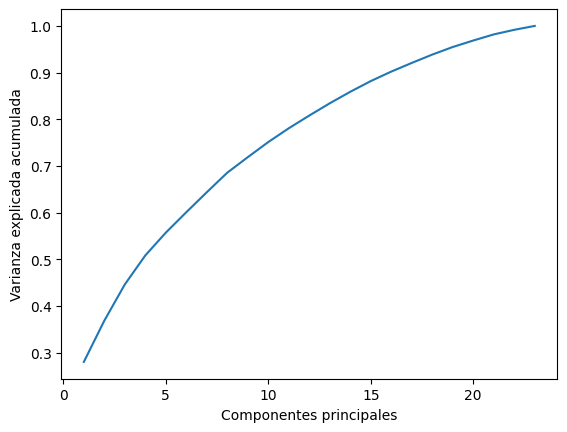

In [ ]:
sns.lineplot( x=range(1, num_variables1 +1), y=pca.explained_variance_ratio_.cumsum())
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada acumulada")

Para este caso también definimos el 80% de la varianza total, y como resultado los dos que más se aproximan en la varianza acumulada son 11 componentes (0.7806) y 12 componentes (0.8079). Finalmente, se decidió que el número de componentes apropiado será **12** ya que este es el que más se acerca al porcentaje escogido.

In [ ]:
#Extraemos los componentes
pca= PCA(12)
pca.fit(scale_feature1)

PCA(n_components=12)

In [ ]:
#Hacemos una tabla que ayude a analizar las cargas de los componentes y entender mejor los componentes principales
pd.DataFrame(pca.components_.T, index= df_num_sa1.columns)

0         1         2         3         4   \
Year_Birth          -0.063925 -0.320521  0.113222 -0.236033 -0.524776   
Income               0.292996  0.059136 -0.025222  0.129795  0.086925   
Kidhome             -0.258393 -0.079082  0.089413 -0.172949 -0.206039   
Teenhome            -0.052572  0.530039 -0.132911  0.083570  0.225082   
Recency             -0.001676  0.027344 -0.154755  0.209032 -0.457857   
MntWines             0.307456  0.191538  0.190641  0.057212 -0.076537   
MntFruits            0.268364 -0.126649 -0.182486 -0.139595 -0.077233   
MntMeatProducts      0.318863 -0.139167 -0.009967 -0.032602 -0.030238   
MntFishProducts      0.279034 -0.144461 -0.175718 -0.128663 -0.071125   
MntSweetProducts     0.271084 -0.115848 -0.157517 -0.110836 -0.106462   
MntGoldProds         0.222707  0.093928 -0.073568 -0.282080 -0.069605   
NumDealsPurchases   -0.049061  0.464948 -0.002400 -0.317027 -0.250800   
NumWebPurchases      0.216706  0.360307  0.016588 -0.222503 -0.135650   
NumCatalogPurchases  0.320194  0.008552 -0.011314 -0.064173  0.032568   
NumStorePurchases    0.289991  0.189190 -0.100173  0.047275 -0.127893   
NumWebVisitsMonth   -0.250487  0.203166  0.177263 -0.277180 -0.215917   
AcceptedCmp3         0.001920 -0.031854  0.195475 -0.435181  0.281964   
AcceptedCmp4         0.087191  0.179985  0.424078  0.332091 -0.189624   
AcceptedCmp5         0.176914 -0.118464  0.381249  0.165274 -0.002504   
AcceptedCmp1         0.155150 -0.092497  0.322597  0.016491  0.061829   
AcceptedCmp2         0.027423  0.093417  0.305464  0.224468 -0.200033   
Complain            -0.019143  0.006195 -0.038783  0.015061  0.143908   
Response             0.092415 -0.052123  0.449378 -0.321806  0.234480   

                           5         6         7         8         9   \
Year_Birth          -0.078136  0.129669  0.084526  0.234343 -0.325911   
Income              -0.012513  0.031623 -0.090471  0.335490  0.029287   
Kidhome              0.119618  0.123119 -0.178503  0.220924  0.323071   
Teenhome            -0.034221 -0.037784 -0.080440  0.051465  0.109650   
Recency              0.379700 -0.610733 -0.255135 -0.051877  0.105464   
MntWines             0.021038 -0.030089 -0.024311  0.082706 -0.208594   
MntFruits            0.006561  0.102246  0.108721 -0.137111  0.114000   
MntMeatProducts      0.045816  0.028408 -0.099316  0.269849  0.139454   
MntFishProducts     -0.002965  0.069624  0.085413 -0.196694  0.238694   
MntSweetProducts    -0.001744  0.088543  0.008417 -0.166524  0.150010   
MntGoldProds         0.006585 -0.185587  0.149375 -0.294839 -0.036889   
NumDealsPurchases    0.049877  0.187120 -0.175120  0.292416  0.285495   
NumWebPurchases      0.011940  0.047560  0.000943 -0.201188 -0.282255   
NumCatalogPurchases  0.039484 -0.095596 -0.032975  0.300216  0.110350   
NumStorePurchases   -0.054682  0.104819  0.087214  0.063352 -0.199511   
NumWebVisitsMonth    0.036243  0.048851  0.009918 -0.277061 -0.054506   
AcceptedCmp3         0.092256 -0.596672  0.159712  0.180478 -0.142741   
AcceptedCmp4        -0.004814  0.071444  0.038824 -0.105492 -0.139920   
AcceptedCmp5         0.096172  0.009119 -0.250888  0.078028 -0.159174   
AcceptedCmp1         0.118985  0.030097 -0.372852 -0.419921  0.292851   
AcceptedCmp2        -0.089064 -0.128795  0.689632  0.052150  0.451764   
Complain             0.884725  0.296600  0.288471  0.027887 -0.107952   
Response             0.018521  0.082764 -0.045198  0.008070  0.160275   

                           10        11  
Year_Birth           0.346836 -0.009860  
Income               0.159969 -0.023489  
Kidhome              0.053125  0.032955  
Teenhome             0.198568 -0.038637  
Recency             -0.208310 -0.077047  
MntWines            -0.009327  0.004364  
MntFruits           -0.149185 -0.213782  
MntMeatProducts     -0.101654 -0.005986  
MntFishProducts      0.012785 -0.123694  
MntSweetProducts    -0.083637 -0.257413  
MntGoldProds         0.028143  0.662328  
NumDealsPurchases

In [ ]:
#Pasamos esto a un excel
pd.DataFrame(pca.components_.T, index= df_num_sa1.columns).to_excel('Componentes_sa.xlsx')

En este caso el quinto componente está fuertemente influenciado por la variable 'Complain' ya que esta tiene una carga en este componente de 0,8846.

###**K-Means**

In [ ]:
z_componentes1= pca.fit_transform(scale_feature1)

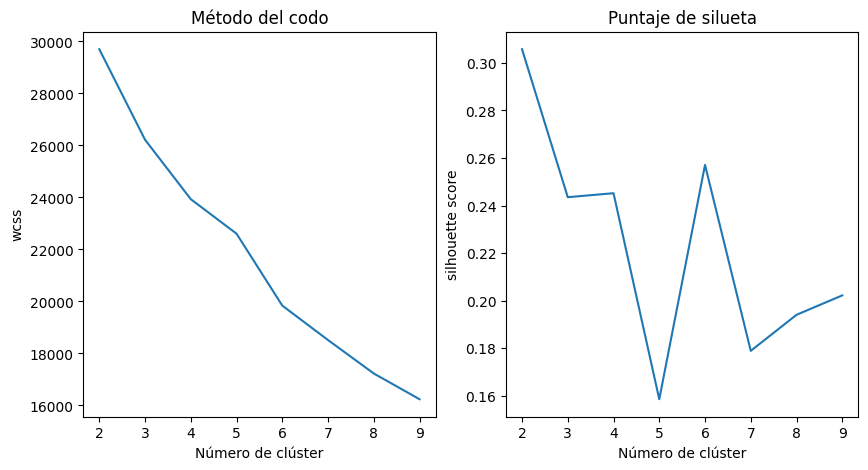

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means2=KMeans(k, random_state=123)
  k_means2.fit(z_componentes1)
  wcss.append(k_means2.inertia_)
  silueta = silhouette_score(z_componentes1, k_means2.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Según el método del codo notamos que hay tres posibles 'codos' los cuales están en los números 4, 5 y 6, siendo el 5 y 6 los más marcados. Por otro lado, en el puntaje de silueta tiene un punto máximo en el número 6.  Analizando los puntos 4 y 5 en el puntaje de silueta nos damos cuenta que en el 5 existe un declive, el cuál deshabilita este como una posible opción. Ahora, fijandonos en el 4, nos damos cuenta que es de los puntos más altos en este puntaje. Sin embargo, al ser el **6** el que se repite en ambos métodos, este es el elegido para el número de clústers.

In [ ]:
#Si escogemos 6
k_means2=KMeans(6, random_state=123)
k_means2.fit(z_componentes1)

df_num_sa1["labels_k_means"]= k_means2.labels_
df_num_sa1["labels_k_means"] = df_num_sa1["labels_k_means"].astype(str)
df_num_sa1["labels_k_means"].value_counts()

labels_k_means
1    995
2    570
0    435
3    155
4     20
5     18
Name: count, dtype: int64

In [ ]:
#Grafiquemos
print(df_num_sa1["labels_k_means"].value_counts(normalize=True))
px.bar(df_num_sa1["labels_k_means"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_k_means
1    0.453716
2    0.259918
0    0.198358
3    0.070679
4    0.009120
5    0.008208
Name: proportion, dtype: float64


###**Clúster Jerárquico**

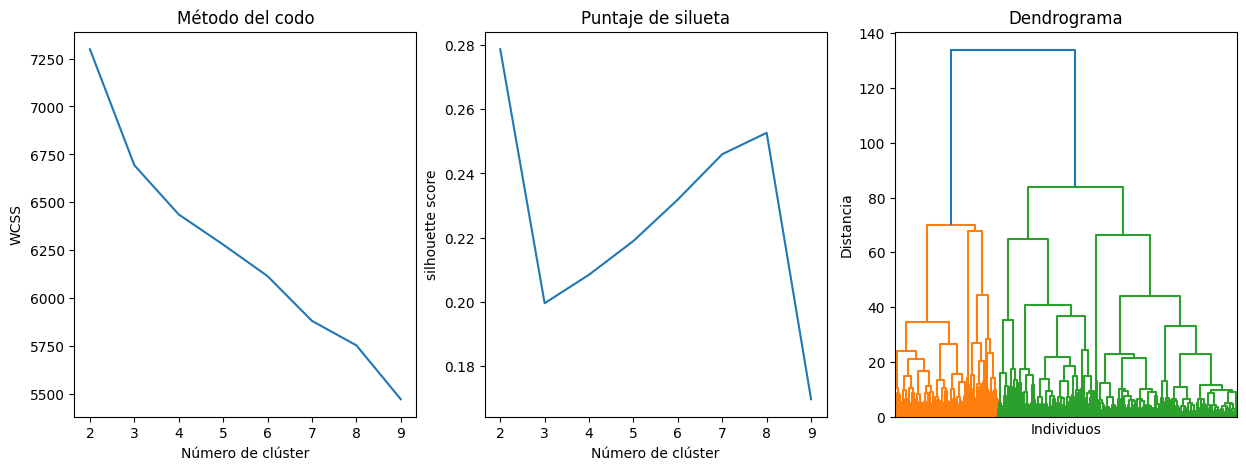

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(z_componentes1)
  scaled_temp= pd.DataFrame(z_componentes1)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(z_componentes1,centros)  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(z_componentes1,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(z_componentes1, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Con base al método del codo, vemos un 'codos' en los puntos 3, 4, 7 y 8. Ahora, según el puntaje de silueta, el punto máximo está ubicado en el 8. Y los posibles números de clústers según el dendograma varían entre 3 y 7.
Si bien el número 3 se repite en dos métodos, en el puntaje de silueta se localiza muy bajo, y por esta razón lo descartaremos. El 4 lo descratamos, al solo estar presente en uno de los 3 métodos. Dejando así los puntos 7 y 8, los cuales se repiten en dos métodos, y es por eso que revisaremos sus frecuencias.

In [ ]:
#Escogiendo 8
hc2=AgglomerativeClustering(8)
hc2.fit(z_componentes1)
df_num_sa1["labels_hc"]= hc2.labels_
df_num_sa1["labels_hc"] = df_num_sa1["labels_hc"].astype(str)
df_num_sa1["labels_hc"].value_counts()

labels_hc
0    890
1    486
3    459
2    134
7    101
6     85
5     20
4     18
Name: count, dtype: int64

In [ ]:
#Escogiendo 7
hc2=AgglomerativeClustering(7)
hc2.fit(z_componentes1)
df_num_sa1["labels_hc"]= hc2.labels_
df_num_sa1["labels_hc"] = df_num_sa1["labels_hc"].astype(str)
df_num_sa1["labels_hc"].value_counts()

labels_hc
2    890
1    486
3    459
0    186
6    134
5     20
4     18
Name: count, dtype: int64

Al final se escogen **7** clústers pues se cree que disrtibuyen mejor los datos, y pueden dar resultados más precisos.

In [ ]:
print(df_num_sa1["labels_hc"].value_counts(normalize=True))
px.bar(df_num_sa1["labels_hc"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_hc
2    0.405837
1    0.221614
3    0.209302
0    0.084815
6    0.061104
5    0.009120
4    0.008208
Name: proportion, dtype: float64


#**7. Análisis de Resultados**

A pesar de que los números de clústers me dan muy similares considerando los componentes principales con y sin atípicos, y la base de datos original, a la hora de implementar 'Clústering Jerárquico' en los tres casos fue difícil escoger el número apropiado de clústers. No obstante, entre los tres, el mas complicado de  escoger, fue con la base de datos original. Por otro lado, aplicando 'K-Means' en los tres casos fue sencillo elegir el número de clústers, pues para los tres casos, los métodos utilizados coinciden en este aspecto. Asimismo, es importante apreciar que para ambos DataFrame 'con' y 'sin' atípicos, el número de clústers coincide.

Finalmente, a la hora de eliminar datos atípicos, para este caso, no encontré gran diferencia cuando se aplicaron los modelos con base a los componentes principales, lo único que podría decir es que fueron los datos donde consideré más fácil escoger el número de clústers comparando con los datos originales (sin componentes).